#***RNN***

#8:2

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/BNB.csv')

In [3]:
# Chỉ lấy cột giá đóng cửa
prices = data['Close'].values.reshape(-1, 1)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Phân chia dữ liệu theo tỉ lệ 8:2
train_size = int(len(scaled_prices) * 0.8)
test_size = int(len(scaled_prices) * 0.2)

train, test= scaled_prices[0:train_size], scaled_prices[train_size:train_size+test_size]

# Hàm tạo các tập dữ liệu theo định dạng thích hợp cho mô hình RNN
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 60
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Định dạng lại dữ liệu đầu vào cho mô hình RNN [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Xây dựng mô hình RNN
model = Sequential()
model.add(SimpleRNN(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
1462/1462 - 12s - loss: 0.0027 - 12s/epoch - 8ms/step
Epoch 2/50
1462/1462 - 9s - loss: 7.8464e-04 - 9s/epoch - 6ms/step
Epoch 3/50
1462/1462 - 10s - loss: 7.2552e-04 - 10s/epoch - 7ms/step
Epoch 4/50
1462/1462 - 10s - loss: 6.5620e-04 - 10s/epoch - 7ms/step
Epoch 5/50
1462/1462 - 10s - loss: 7.0253e-04 - 10s/epoch - 7ms/step
Epoch 6/50
1462/1462 - 9s - loss: 7.2400e-04 - 9s/epoch - 6ms/step
Epoch 7/50
1462/1462 - 12s - loss: 6.2284e-04 - 12s/epoch - 8ms/step
Epoch 8/50
1462/1462 - 10s - loss: 6.3815e-04 - 10s/epoch - 7ms/step
Epoch 9/50
1462/1462 - 11s - loss: 6.9017e-04 - 11s/epoch - 7ms/step
Epoch 10/50
1462/1462 - 9s - loss: 5.9663e-04 - 9s/epoch - 6ms/step
Epoch 11/50
1462/1462 - 11s - loss: 6.3729e-04 - 11s/epoch - 8ms/step
Epoch 12/50
1462/1462 - 10s - loss: 6.3814e-04 - 10s/epoch - 7ms/step
Epoch 13/50
1462/1462 - 11s - loss: 6.4091e-04 - 11s/epoch - 7ms/step
Epoch 14/50
1462/1462 - 9s - loss: 5.8713e-04 - 9s/epoch - 6ms/step
Epoch 15/50
1462/1462 - 10s - loss: 5.889

In [4]:
# Đánh giá mô hình
test_predict = model.predict(X_test)
test_predict = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform([y_test])

mse = mean_squared_error(y_test_actual[0], test_predict[:,0])
mae = mean_absolute_error(y_test_actual[0], test_predict[:,0])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_actual[0] - test_predict[:,0]) / y_test_actual[0])) * 100

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

10/10 [==============================] - 0s 4ms/step
MAE: 7.3874814972129705
RMSE: 12.331288223409464
MAPE: 2.113940004521234


1/1 [==============================] - 0s 27ms/step
30-day predictions: [568.59686 566.0395  562.69086 559.1247  557.65283 555.2689  552.8195
 550.4755  548.823   547.1671  545.3693  543.62744 542.1545  540.8243
 539.5114  538.1909  536.9773  535.8835  534.85364 533.85223 532.8919
 531.9997  531.1698  530.3813  529.6286  528.91473 528.2425  527.60614
 527.0036  526.4319 ]
60-day predictions: [568.59686 566.0395  562.69086 559.1247  557.65283 555.2689  552.8195
 550.4755  548.823   547.1671  545.3693  543.62744 542.1545  540.8243
 539.5114  538.1909  536.9773  535.8835  534.85364 533.85223 532.8919
 531.9997  531.1698  530.3813  529.6286  528.91473 528.2425  527.60614
 527.0036  526.4319  525.8892  525.3751  524.8906  524.43256 523.9987
 523.5872  523.1987  522.8315  522.4832  522.1527  521.8381  521.5397
 521.2582  520.9913  520.7362  520.49255 520.262   520.04706 519.84375
 519.6497  519.4643  519.28784 519.12274 518.9677  518.8191  518.6774
 518.5437  518.4177  518.2961  518.1813 ]
9

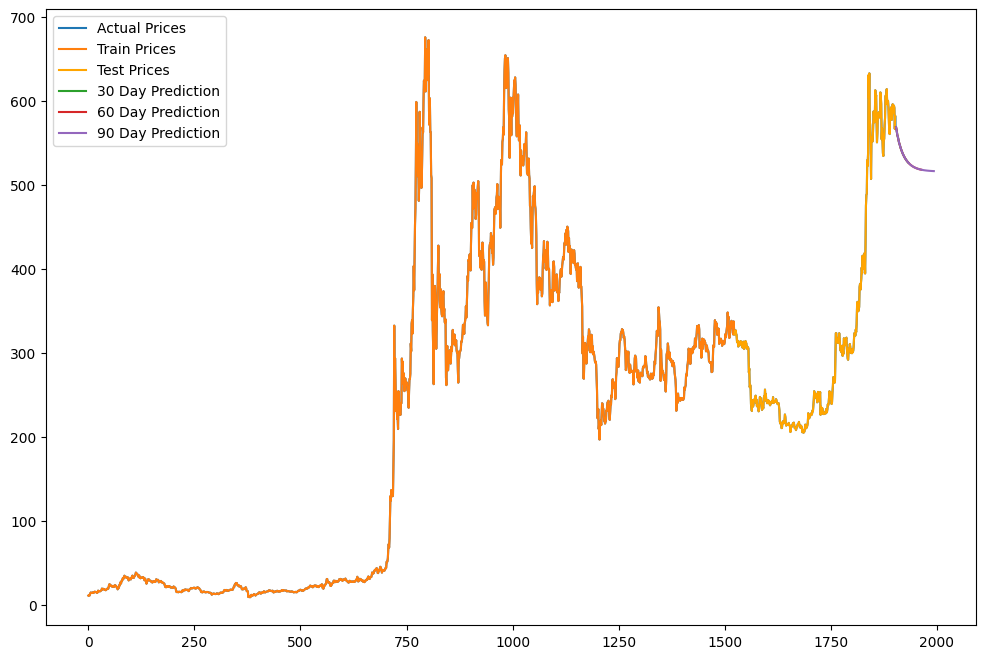

In [5]:
# Predict future values
def predict_future(model, data, days, look_back):
    predictions = []
    current_step = data[-look_back:]
    for _ in range(days):
        prediction = model.predict(current_step.reshape(1, look_back, 1))
        predictions.append(prediction[0, 0])
        current_step = np.append(current_step[1:], prediction[0, 0])
    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Predict 30, 60, and 90 days
pred_30 = predict_future(model, scaled_prices, 30, look_back)
pred_60 = predict_future(model, scaled_prices, 60, look_back)
pred_90 = predict_future(model, scaled_prices, 90, look_back)

# Print daily predictions
print("30-day predictions:", pred_30.flatten())
print("60-day predictions:", pred_60.flatten())
print("90-day predictions:", pred_90.flatten())

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(scaler.inverse_transform(scaled_prices), label='Actual Prices')
plt.plot(range(len(train)), scaler.inverse_transform(train), label='Train Prices')
plt.plot(range(len(train), len(train) + len(test)), scaler.inverse_transform(test), label='Test Prices', color='orange')
plt.plot(np.arange(len(scaled_prices), len(scaled_prices) + 30), pred_30, label='30 Day Prediction')
plt.plot(np.arange(len(scaled_prices), len(scaled_prices) + 60), pred_60, label='60 Day Prediction')
plt.plot(np.arange(len(scaled_prices), len(scaled_prices) + 90), pred_90, label='90 Day Prediction')
plt.legend()
plt.show()

#7:3

In [7]:
# Chỉ lấy cột giá đóng cửa
prices = data['Close'].values.reshape(-1, 1)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Phân chia dữ liệu theo tỉ lệ 7:3
train_size = int(len(scaled_prices) * 0.7)
test_size = int(len(scaled_prices) * 0.3)

train, test = scaled_prices[0:train_size], scaled_prices[train_size:train_size+test_size]

# Hàm tạo các tập dữ liệu theo định dạng thích hợp cho mô hình RNN
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 60
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Định dạng lại dữ liệu đầu vào cho mô hình RNN [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Xây dựng mô hình RNN
model = Sequential()
model.add(SimpleRNN(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
1271/1271 - 12s - loss: 0.0028 - 12s/epoch - 9ms/step
Epoch 2/50
1271/1271 - 8s - loss: 8.2957e-04 - 8s/epoch - 7ms/step
Epoch 3/50
1271/1271 - 10s - loss: 7.9027e-04 - 10s/epoch - 8ms/step
Epoch 4/50
1271/1271 - 10s - loss: 7.9657e-04 - 10s/epoch - 8ms/step
Epoch 5/50
1271/1271 - 9s - loss: 8.4925e-04 - 9s/epoch - 7ms/step
Epoch 6/50
1271/1271 - 11s - loss: 7.3088e-04 - 11s/epoch - 9ms/step
Epoch 7/50
1271/1271 - 10s - loss: 7.5888e-04 - 10s/epoch - 8ms/step
Epoch 8/50
1271/1271 - 8s - loss: 6.8016e-04 - 8s/epoch - 7ms/step
Epoch 9/50
1271/1271 - 9s - loss: 7.0830e-04 - 9s/epoch - 7ms/step
Epoch 10/50
1271/1271 - 10s - loss: 7.0850e-04 - 10s/epoch - 8ms/step
Epoch 11/50
1271/1271 - 8s - loss: 6.8889e-04 - 8s/epoch - 6ms/step
Epoch 12/50
1271/1271 - 10s - loss: 9.8830e-04 - 10s/epoch - 8ms/step
Epoch 13/50
1271/1271 - 10s - loss: 5.8213e-04 - 10s/epoch - 8ms/step
Epoch 14/50
1271/1271 - 8s - loss: 6.1417e-04 - 8s/epoch - 7ms/step
Epoch 15/50
1271/1271 - 10s - loss: 6.1688e-0

In [8]:
# Đánh giá mô hình
test_predict = model.predict(X_test)
test_predict = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform([y_test])

mse = mean_squared_error(y_test_actual[0], test_predict[:,0])
mae = mean_absolute_error(y_test_actual[0], test_predict[:,0])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_actual[0] - test_predict[:,0]) / y_test_actual[0])) * 100

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

16/16 [==============================] - 0s 5ms/step
MAE: 6.465811456680836
RMSE: 10.690893536422125
MAPE: 1.924878411365117


1/1 [==============================] - 0s 23ms/step
30-day predictions: [569.2273  566.9807  567.3471  562.25006 563.1464  560.37463 559.53925
 557.4865  556.8079  555.17444 554.1451  552.90704 551.9449  550.8546
 549.9169  548.97363 548.12115 547.2651  546.48926 545.7151  545.01294
 544.30786 543.67145 543.03186 542.4527  541.87115 541.34314 540.81616
 540.3341  539.85547]
60-day predictions: [569.2273  566.9807  567.3471  562.25006 563.1464  560.37463 559.53925
 557.4865  556.8079  555.17444 554.1451  552.90704 551.9449  550.8546
 549.9169  548.97363 548.12115 547.2651  546.48926 545.7151  545.01294
 544.30786 543.67145 543.03186 542.4527  541.87115 541.34314 540.81616
 540.3341  539.85547 539.4145  538.9799  538.57684 538.1818  537.81305
 537.4537  537.11633 536.78906 536.4806  536.1822  535.9001  535.62775
 535.3697  535.12115 534.8851  534.65796 534.4421  534.23456 534.037
 533.84717 533.6664  533.4928  533.3273  533.1685  533.01697 532.8717
 532.7329  532.6     532.4729  532.3512

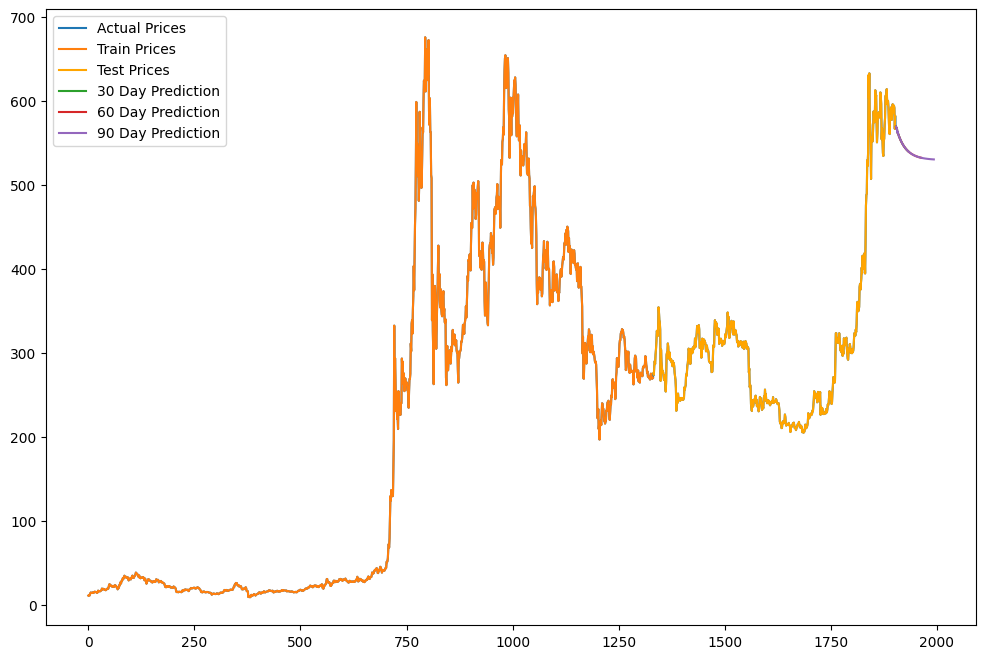

In [9]:
# Predict future values
def predict_future(model, data, days, look_back):
    predictions = []
    current_step = data[-look_back:]
    for _ in range(days):
        prediction = model.predict(current_step.reshape(1, look_back, 1))
        predictions.append(prediction[0, 0])
        current_step = np.append(current_step[1:], prediction[0, 0])
    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Predict 30, 60, and 90 days
pred_30 = predict_future(model, scaled_prices, 30, look_back)
pred_60 = predict_future(model, scaled_prices, 60, look_back)
pred_90 = predict_future(model, scaled_prices, 90, look_back)

# Print daily predictions
print("30-day predictions:", pred_30.flatten())
print("60-day predictions:", pred_60.flatten())
print("90-day predictions:", pred_90.flatten())

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(scaler.inverse_transform(scaled_prices), label='Actual Prices')
plt.plot(range(len(train)), scaler.inverse_transform(train), label='Train Prices')
plt.plot(range(len(train), len(train) + len(test)), scaler.inverse_transform(test), label='Test Prices', color='orange')
plt.plot(np.arange(len(scaled_prices), len(scaled_prices) + 30), pred_30, label='30 Day Prediction')
plt.plot(np.arange(len(scaled_prices), len(scaled_prices) + 60), pred_60, label='60 Day Prediction')
plt.plot(np.arange(len(scaled_prices), len(scaled_prices) + 90), pred_90, label='90 Day Prediction')
plt.legend()
plt.show()

#6:4

In [10]:
# Chỉ lấy cột giá đóng cửa
prices = data['Close'].values.reshape(-1, 1)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Phân chia dữ liệu theo tỉ lệ 6:4
train_size = int(len(scaled_prices) * 0.6)
test_size = int(len(scaled_prices) * 0.4)

train, test = scaled_prices[0:train_size], scaled_prices[train_size:train_size+test_size]

# Hàm tạo các tập dữ liệu theo định dạng thích hợp cho mô hình RNN
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 60
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Định dạng lại dữ liệu đầu vào cho mô hình RNN [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Xây dựng mô hình RNN
model = Sequential()
model.add(SimpleRNN(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
1081/1081 - 9s - loss: 0.0047 - 9s/epoch - 8ms/step
Epoch 2/50
1081/1081 - 7s - loss: 0.0012 - 7s/epoch - 7ms/step
Epoch 3/50
1081/1081 - 8s - loss: 9.1379e-04 - 8s/epoch - 8ms/step
Epoch 4/50
1081/1081 - 7s - loss: 9.1206e-04 - 7s/epoch - 6ms/step
Epoch 5/50
1081/1081 - 8s - loss: 8.5543e-04 - 8s/epoch - 8ms/step
Epoch 6/50
1081/1081 - 7s - loss: 7.6949e-04 - 7s/epoch - 7ms/step
Epoch 7/50
1081/1081 - 8s - loss: 7.8472e-04 - 8s/epoch - 8ms/step
Epoch 8/50
1081/1081 - 8s - loss: 8.5105e-04 - 8s/epoch - 7ms/step
Epoch 9/50
1081/1081 - 7s - loss: 7.6743e-04 - 7s/epoch - 7ms/step
Epoch 10/50
1081/1081 - 8s - loss: 8.4466e-04 - 8s/epoch - 8ms/step
Epoch 11/50
1081/1081 - 7s - loss: 7.4462e-04 - 7s/epoch - 7ms/step
Epoch 12/50
1081/1081 - 8s - loss: 7.7798e-04 - 8s/epoch - 8ms/step
Epoch 13/50
1081/1081 - 7s - loss: 6.7221e-04 - 7s/epoch - 7ms/step
Epoch 14/50
1081/1081 - 8s - loss: 8.1246e-04 - 8s/epoch - 8ms/step
Epoch 15/50
1081/1081 - 9s - loss: 7.3285e-04 - 9s/epoch - 9ms/st

In [11]:
# Đánh giá mô hình
test_predict = model.predict(X_test)
test_predict = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform([y_test])

mse = mean_squared_error(y_test_actual[0], test_predict[:,0])
mae = mean_absolute_error(y_test_actual[0], test_predict[:,0])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_actual[0] - test_predict[:,0]) / y_test_actual[0])) * 100

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

22/22 [==============================] - 0s 4ms/step
MAE: 11.910264086326174
RMSE: 14.490129790078763
MAPE: 4.077525067656145


1/1 [==============================] - 0s 28ms/step
30-day predictions: [572.9554  578.73724 583.23236 585.53516 591.6563  595.4291  598.5707
 602.42474 605.7593  608.38983 611.1474  613.5279  615.4495  617.2384
 618.7927  620.1179  621.2921  622.362   623.28394 624.1064  624.82623
 625.4547  625.9984  626.47424 626.89014 627.25134 627.57086 627.8495
 628.0954  628.3083 ]
60-day predictions: [572.9554  578.73724 583.23236 585.53516 591.6563  595.4291  598.5707
 602.42474 605.7593  608.38983 611.1474  613.5279  615.4495  617.2384
 618.7927  620.1179  621.2921  622.362   623.28394 624.1064  624.82623
 625.4547  625.9984  626.47424 626.89014 627.25134 627.57086 627.8495
 628.0954  628.3083  628.4955  628.65753 628.7995  628.92285 629.03076
 629.1251  629.2074  629.2796  629.3423  629.3973  629.44495 629.4869
 629.52325 629.5551  629.5828  629.607   629.6281  629.6464  629.66254
 629.6765  629.6888  629.6994  629.7088  629.7169  629.7241  629.73016
 629.7357  629.7405  629.7445  629.74805]

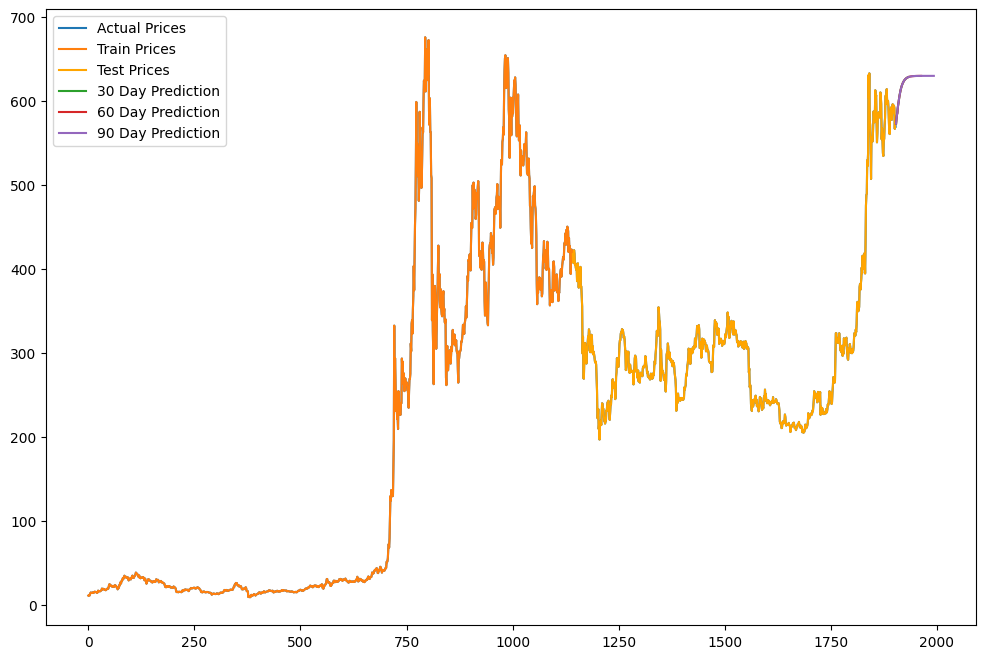

In [12]:
# Predict future values
def predict_future(model, data, days, look_back):
    predictions = []
    current_step = data[-look_back:]
    for _ in range(days):
        prediction = model.predict(current_step.reshape(1, look_back, 1))
        predictions.append(prediction[0, 0])
        current_step = np.append(current_step[1:], prediction[0, 0])
    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Predict 30, 60, and 90 days
pred_30 = predict_future(model, scaled_prices, 30, look_back)
pred_60 = predict_future(model, scaled_prices, 60, look_back)
pred_90 = predict_future(model, scaled_prices, 90, look_back)

# Print daily predictions
print("30-day predictions:", pred_30.flatten())
print("60-day predictions:", pred_60.flatten())
print("90-day predictions:", pred_90.flatten())

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(scaler.inverse_transform(scaled_prices), label='Actual Prices')
plt.plot(range(len(train)), scaler.inverse_transform(train), label='Train Prices')
plt.plot(range(len(train), len(train) + len(test)), scaler.inverse_transform(test), label='Test Prices', color='orange')
plt.plot(np.arange(len(scaled_prices), len(scaled_prices) + 30), pred_30, label='30 Day Prediction')
plt.plot(np.arange(len(scaled_prices), len(scaled_prices) + 60), pred_60, label='60 Day Prediction')
plt.plot(np.arange(len(scaled_prices), len(scaled_prices) + 90), pred_90, label='90 Day Prediction')
plt.legend()
plt.show()